<a href="https://colab.research.google.com/github/Jayaprakash1710/NLP-FlipItNews/blob/main/FlipItNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import html
import re

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

https://drive.google.com/file/d/1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u/view?usp=sharing

In [2]:
!gdown 1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u

Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 23.2MB/s]


In [3]:
df=pd.read_csv('/content/flipitnews-data.csv')

In [4]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
df.shape

(2225, 2)

<ipython-input-6-1154910130>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')


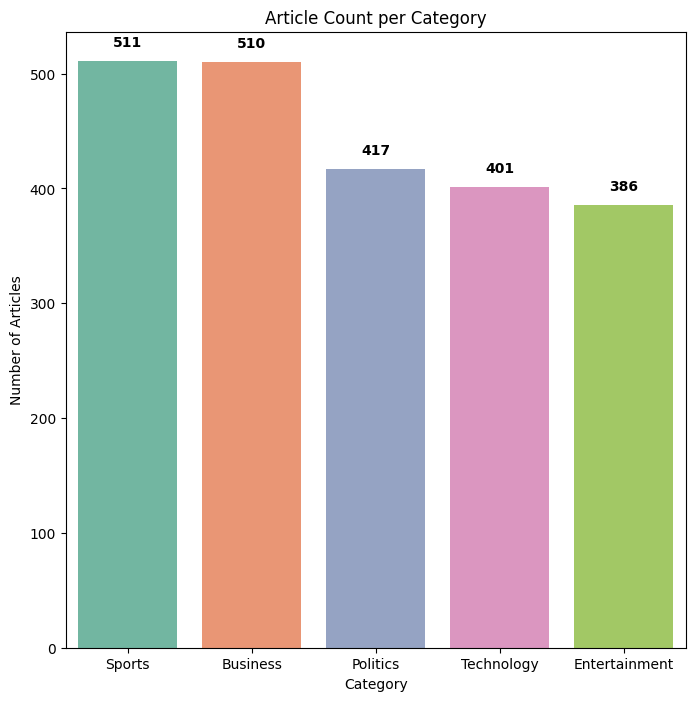

In [6]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8,8))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Article Count per Category')
plt.ylabel('Number of Articles')
plt.xlabel('Category')

for i, v in enumerate(category_counts.values):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

# Preprocessing:

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    elif treebank_tag in ('PRP', 'PRP$'):
        return 'PRON'
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = html.unescape(text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = text.lower()

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]

    tagged = pos_tag(tokens)

    processed_tokens = []
    for word, pos in tagged:
        wn_pos = get_wordnet_pos(pos)
        if wn_pos == 'PRON':
            processed_tokens.append(word)
        else:
            processed_tokens.append(lemmatizer.lemmatize(word, wn_pos))

    return processed_tokens

df['processed_tokens'] = df['Article'].apply(preprocess_text)
df['processed_text'] = df['processed_tokens'].apply(lambda tokens: ' '.join(tokens))

In [8]:
df.head()

,Category,Article,processed_tokens,processed_text
0,Technology,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst...",tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,"[worldcom, bos, leave, book, alone, former, wo...",worldcom bos leave book alone former worldcom ...
2,Sports,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,...",tiger wary farrell gamble leicester say rush m...
3,Sports,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi...",yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelve, raid, box, office, ocean, twel...",ocean twelve raid box office ocean twelve crim...


In [9]:
print(df.head(1).iloc[0][1])
print(df.head(1).iloc[0][2])

tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high-

<ipython-input-9-1180806947>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.head(1).iloc[0][1])
<ipython-input-9-1180806947>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.head(1).iloc[0][2])


<ipython-input-10-396081921>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_length.index, y=avg_length.values, palette='Set2')


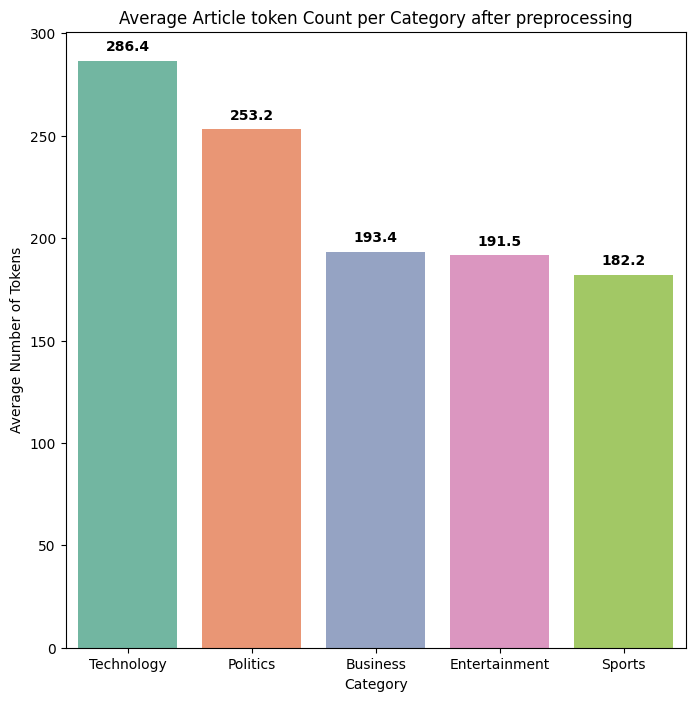

In [10]:
avg_length = df.groupby('Category')['processed_tokens'].apply(lambda x: x.apply(len).mean()).sort_values(ascending=False)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=avg_length.index, y=avg_length.values, palette='Set2')
plt.title('Average Article token Count per Category after preprocessing')
plt.xlabel('Category')
plt.ylabel('Average Number of Tokens')

for i, v in enumerate(avg_length.values):
    ax.text(i, v + 5, f"{v:.1f}", ha='center', fontweight='bold')

plt.show()

# Data preprocessing:

Getting only the required features:

In [11]:
df=df.loc[::,['Category','processed_text']]
df.head()

,Category,processed_text
0,Technology,tv future hand viewer home theatre system plas...
1,Business,worldcom bos leave book alone former worldcom ...
2,Sports,tiger wary farrell gamble leicester say rush m...
3,Sports,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean twelve raid box office ocean twelve crim...


Splitting the data for training, validating, and testing:

In [12]:
from sklearn.model_selection import train_test_split

train_val,test=train_test_split(df,test_size=0.15,stratify=df['Category'],random_state=42)
train,val=train_test_split(train_val,test_size=0.1765,stratify=train_val['Category'],random_state=42)

print(f'Train data shape:{train.shape}')
print(f'Validation data shape:{val.shape}')
print(f'Test data shape:{test.shape}')

Train data shape:(1557, 2)
Validation data shape:(334, 2)
Test data shape:(334, 2)


Creating X and y with Tfidf Vectorizer and Label encoding:

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf=TfidfVectorizer()

X_train=tf_idf.fit_transform(train['processed_text'])
X_val=tf_idf.transform(val['processed_text'])
X_test=tf_idf.transform(test['processed_text'])

In [14]:
pd.DataFrame(X_train.toarray(),columns=tf_idf.get_feature_names_out()).describe()

,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aan,aarhus,...,zombic,zombie,zone,zonealarm,zoom,zooropa,zornotza,zubair,zurich,zutons
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,...,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,0.000036,0.000353,0.000236,0.000104,0.000108,0.000331,0.000066,0.000038,0.000010,0.000037,...,0.000134,0.000381,0.000758,0.000024,0.000158,0.000039,0.000090,0.000046,0.000440,0.000077
std,0.001421,0.007283,0.005454,0.002948,0.004276,0.013062,0.002620,0.001508,0.000385,0.001479,...,0.005287,0.006490,0.008939,0.000938,0.002805,0.001547,0.003541,0.001799,0.005739,0.003058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.056090,0.191688,0.181048,0.093948,0.168733,0.515414,0.103384,0.059485,0.015209,0.058363,...,0.208608,0.174482,0.196180,0.037020,0.060111,0.061040,0.139722,0.070997,0.100019,0.120656


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

y_train=encoder.fit_transform(train['Category'])
y_val=encoder.transform(val['Category'])
y_test=encoder.transform(test['Category'])

# Evaluation:

In [19]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [28]:
def evaluate(model_name,model,y_test,y_pred):
  print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
  print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
  print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
  print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

  cm=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),display_labels=encoder.inverse_transform(model.classes_))
  cm.plot(cmap='Blues',xticks_rotation=45)
  plt.title(f'Confusion matrix of {model_name} model')
  plt.show()

# Naive Bayes:

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [30]:
nb_pred=nb_model.predict(X_test)

Accuracy: 0.9880239520958084
Precision: 0.9884706112251022
Recall: 0.9880239520958084
F1 Score: 0.988072534991884


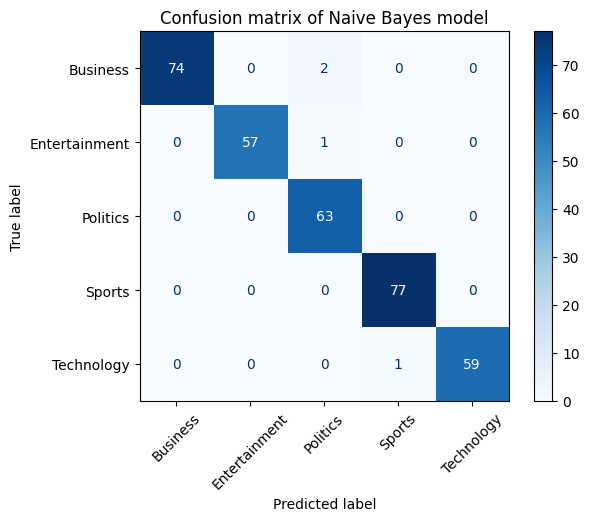

In [31]:
evaluate('Naive Bayes',nb_model,y_test,nb_pred)

# K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

No. of neighbors 3
Accuracy: 0.9191616766467066
Precision: 0.9216850887115037
Recall: 0.9191616766467066
F1 Score: 0.9195286997583347


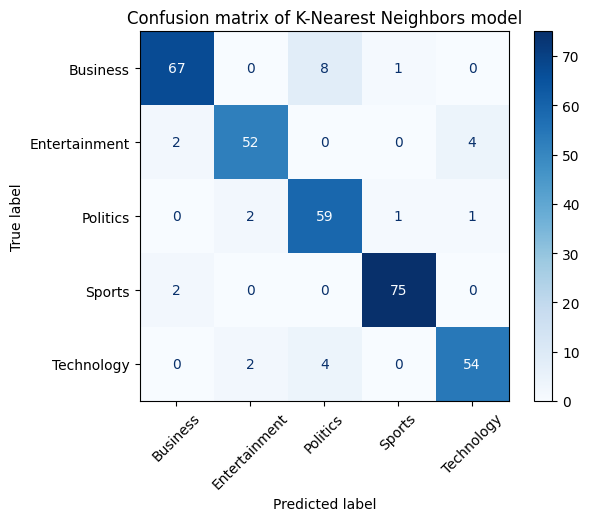

              
-------------------------------------------------
              
No. of neighbors 5
Accuracy: 0.9281437125748503
Precision: 0.9348867882826281
Recall: 0.9281437125748503
F1 Score: 0.9294893592840504


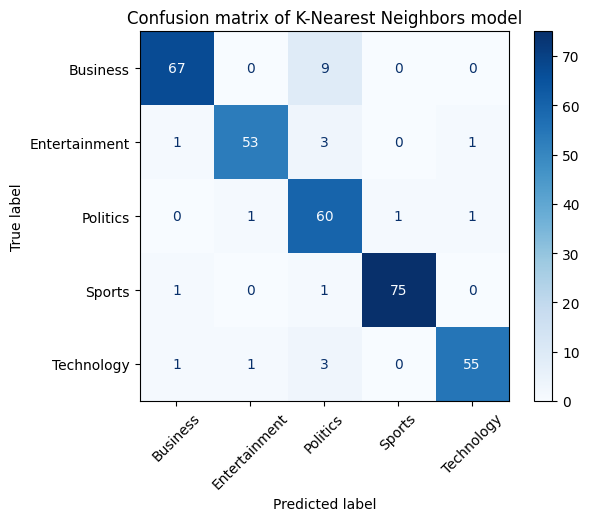

              
-------------------------------------------------
              
No. of neighbors 7
Accuracy: 0.937125748502994
Precision: 0.9426341842860531
Recall: 0.937125748502994
F1 Score: 0.9379972650199919


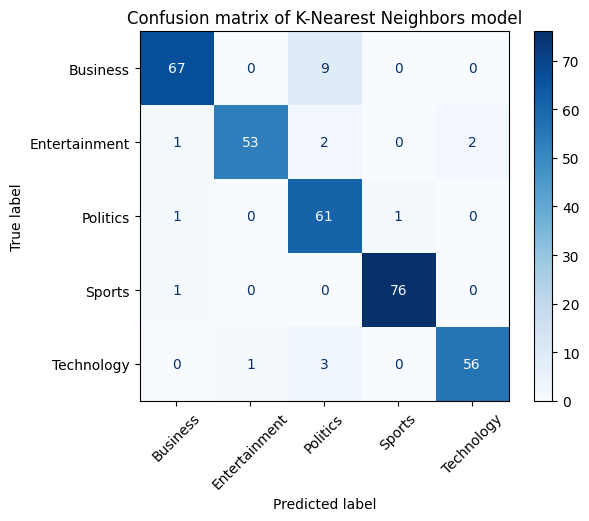

              
-------------------------------------------------
              
No. of neighbors 9
Accuracy: 0.937125748502994
Precision: 0.9417092005336569
Recall: 0.937125748502994
F1 Score: 0.9378537160837522


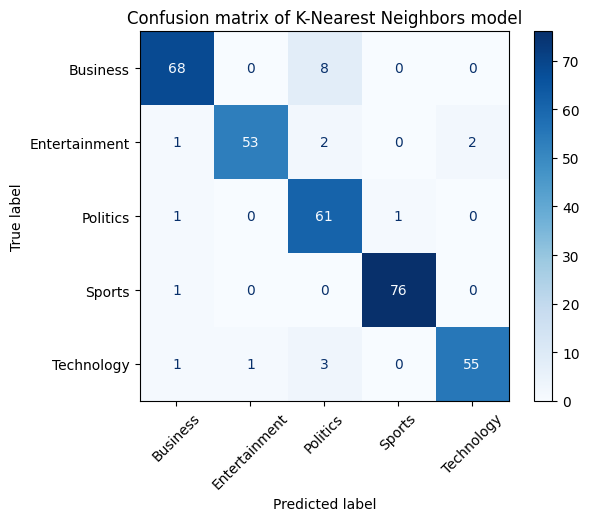

              
-------------------------------------------------
              
No. of neighbors 11
Accuracy: 0.9520958083832335
Precision: 0.954510524803689
Recall: 0.9520958083832335
F1 Score: 0.9526422611135608


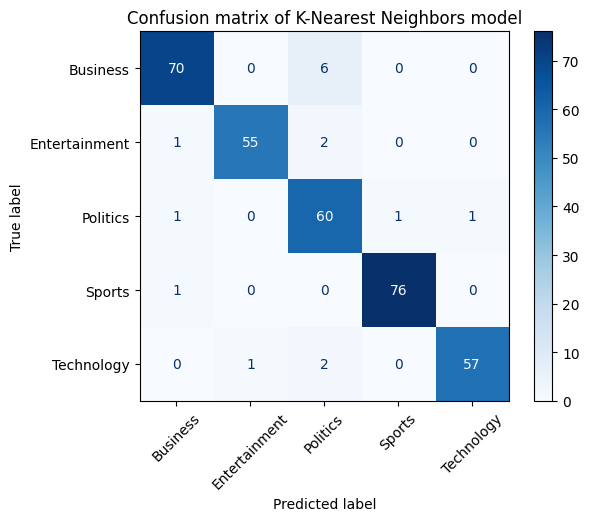

              
-------------------------------------------------
              
No. of neighbors 13
Accuracy: 0.9550898203592815
Precision: 0.9572379051420968
Recall: 0.9550898203592815
F1 Score: 0.9554654671356252


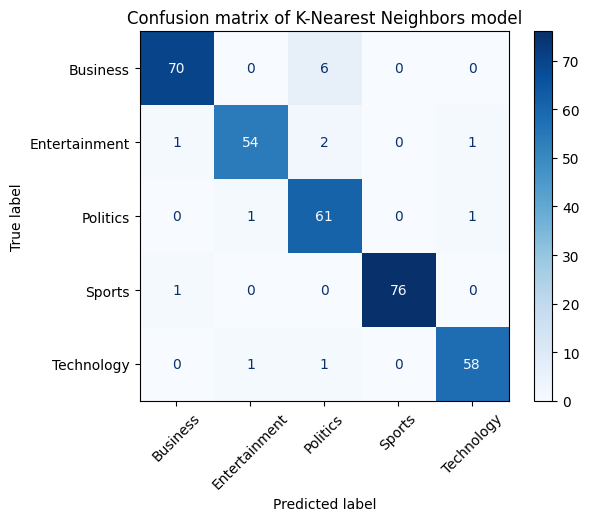

              
-------------------------------------------------
              
No. of neighbors 15
Accuracy: 0.9610778443113772
Precision: 0.9627229142021068
Recall: 0.9610778443113772
F1 Score: 0.9613597530385438


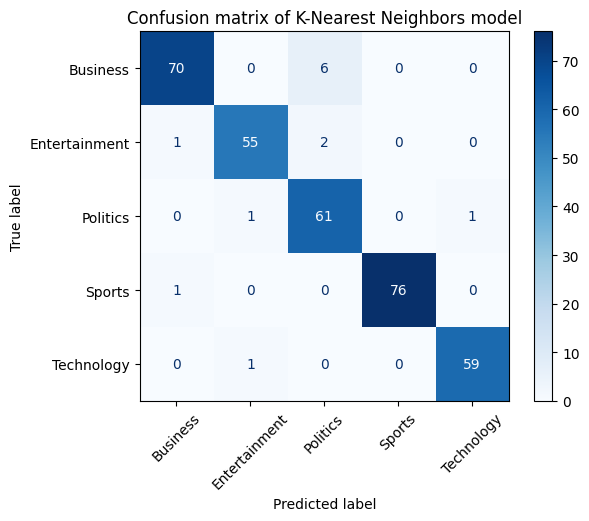

              
-------------------------------------------------
              
No. of neighbors 17
Accuracy: 0.9580838323353293
Precision: 0.9591400494758604
Recall: 0.9580838323353293
F1 Score: 0.9581965534124447


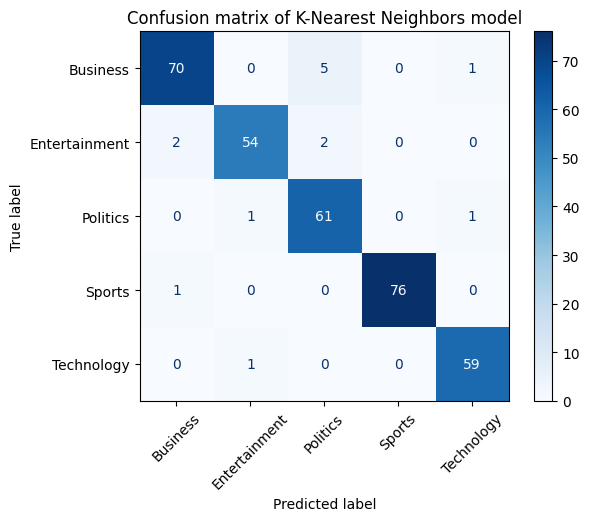

              
-------------------------------------------------
              
No. of neighbors 19
Accuracy: 0.9550898203592815
Precision: 0.9566524633785394
Recall: 0.9550898203592815
F1 Score: 0.9551270983203534


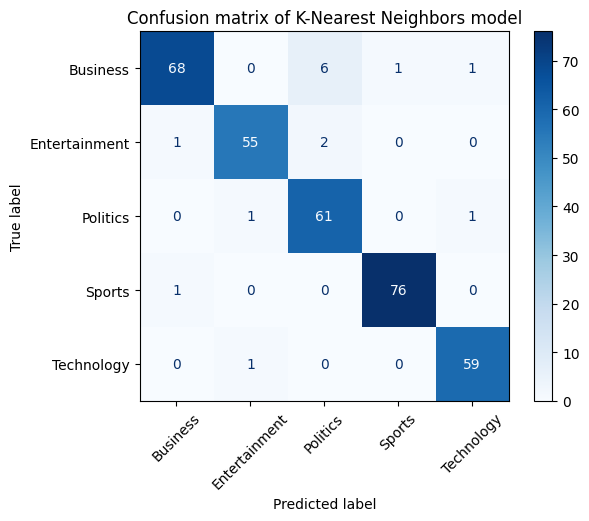

              
-------------------------------------------------
              
No. of neighbors 21
Accuracy: 0.9610778443113772
Precision: 0.9628971169285822
Recall: 0.9610778443113772
F1 Score: 0.961238163860506


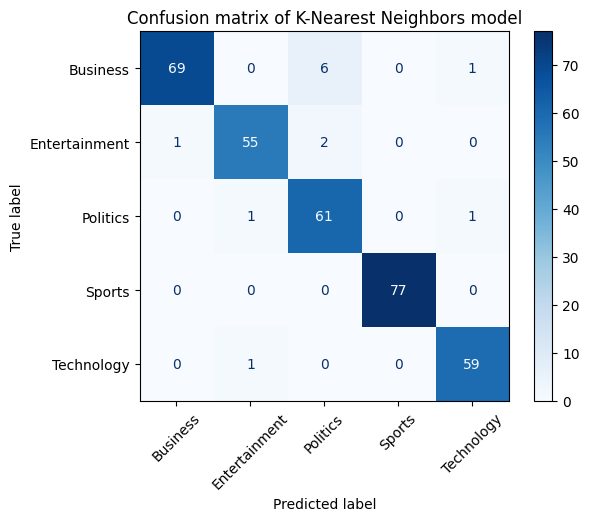

              
-------------------------------------------------
              
No. of neighbors 23
Accuracy: 0.9580838323353293
Precision: 0.9590208128634373
Recall: 0.9580838323353293
F1 Score: 0.9581283876036555


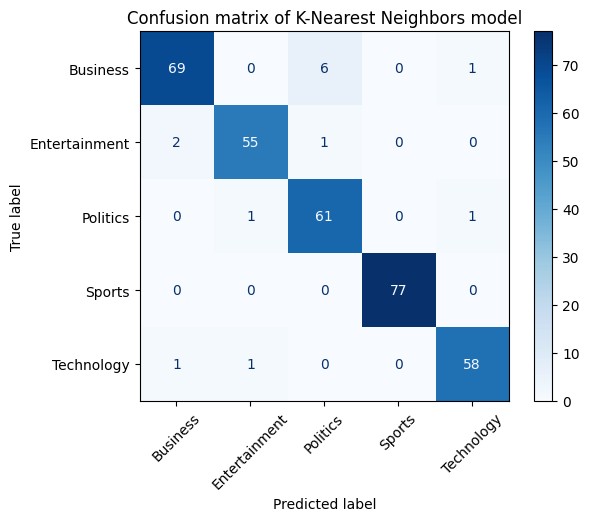

              
-------------------------------------------------
              
No. of neighbors 25
Accuracy: 0.9580838323353293
Precision: 0.9596464753545872
Recall: 0.9580838323353293
F1 Score: 0.9581211102964012


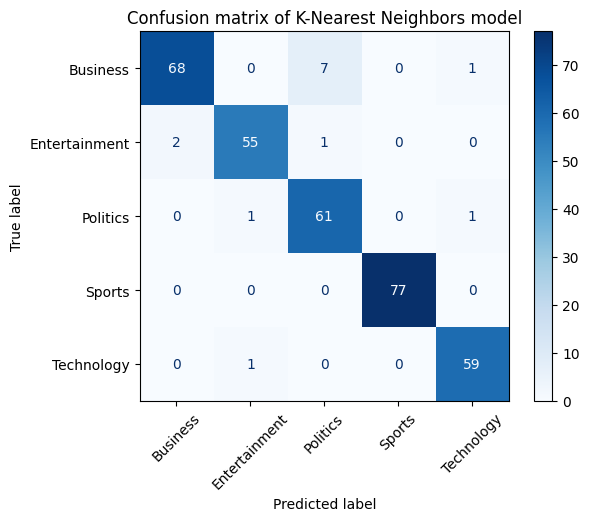

              
-------------------------------------------------
              
No. of neighbors 27
Accuracy: 0.9550898203592815
Precision: 0.9564350205059312
Recall: 0.9550898203592815
F1 Score: 0.9551450861284609


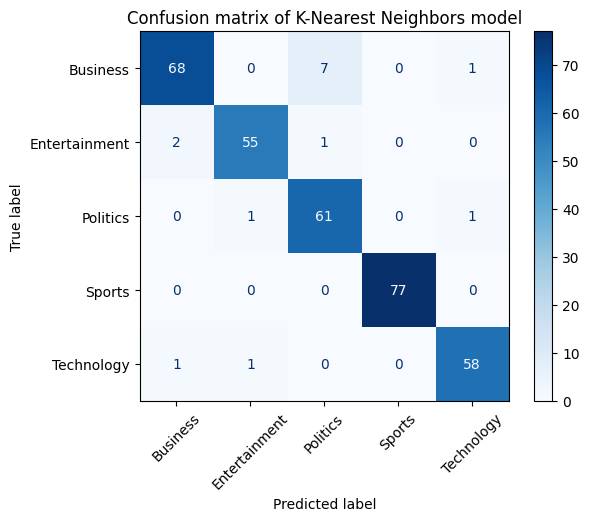

              
-------------------------------------------------
              
No. of neighbors 29
Accuracy: 0.9610778443113772
Precision: 0.9621971880596718
Recall: 0.9610778443113772
F1 Score: 0.9611338158703624


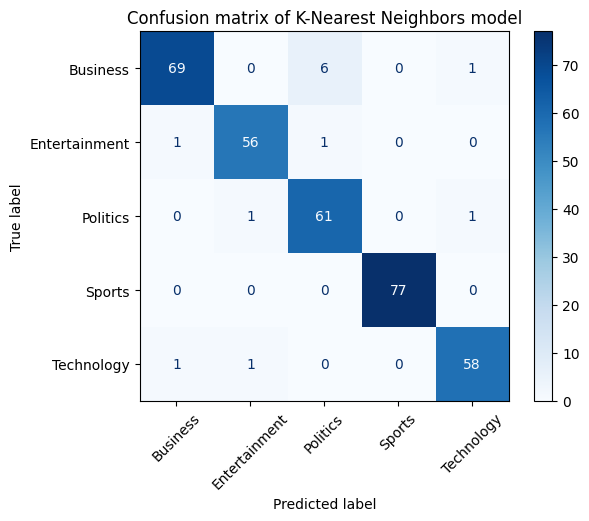

              
-------------------------------------------------
              


In [81]:
for i in range(3,30,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  knn_pred=knn.predict(X_test)
  print(f'No. of neighbors {i}')
  evaluate('K-Nearest Neighbors',knn,y_test,knn_pred)
  print('              ')
  print('-------------------------------------------------')
  print('              ')

# Random Forest:

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

Accuracy: 0.9790419161676647
Precision: 0.9792272102069499
Recall: 0.9790419161676647
F1 Score: 0.9789903117224473


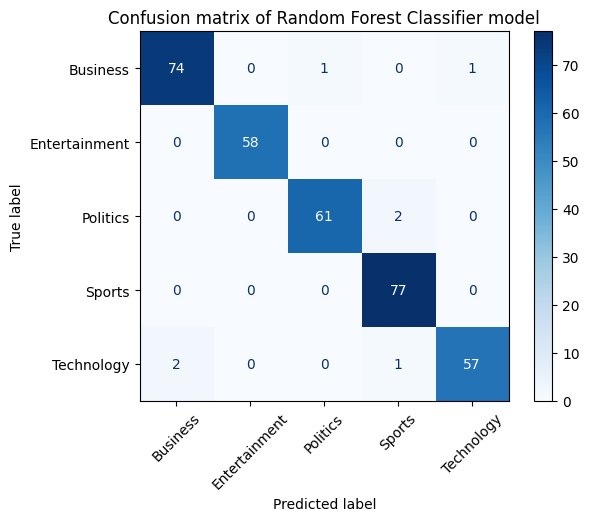

In [84]:
evaluate('Random Forest Classifier',rfc,y_test,rfc_pred)